In [58]:
import os
import pickle as pkl

import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def PrepareData(path):
    df = pd.read_csv(path, sep = "\t", skiprows=1)
    df.rename(columns={
        df.columns[-1]:df.columns[-1].split(".")[0]
    }, inplace = True)
    return df[[df.columns[-1].split(".")[0]]]

In [60]:
SrrBase = pd.read_csv("Data/SRR2047523.fastq_trimmed.fastq_Aligned.sortedByCoord.out.bam_counts.txt", sep = "\t",skiprows=1)
GenLenKB = SrrBase['Length'] / 1000  # Converter para kilobases (kb)
GenId =    SrrBase["Geneid"]

In [61]:
Counts = pd.DataFrame()
for i in os.listdir("Data"):
    df = PrepareData(os.path.join("Data",i))
    Counts = pd.concat([Counts, df], axis = 1)

In [62]:
Counts

,SRR2047529,SRR2047534,SRR2047528,SRR2047531,SRR2047526,SRR2047527,SRR2047530,SRR2047532,SRR2047535,SRR2047537,SRR2047533,SRR2047540,SRR2047538,SRR2047536,SRR2047524,SRR2047539,SRR2047523,SRR2047525
0,60,82,62,41,36,53,44,68,96,96,71,79,91,73,48,78,44,68
1,26,22,26,18,7,20,6,23,26,19,17,30,28,11,14,17,13,36
2,32,45,36,29,25,32,23,52,61,51,36,38,49,42,33,35,28,26
3,37,332,27,35,25,38,31,243,299,321,153,330,275,179,25,183,29,31
4,22,54,24,14,17,31,25,47,58,81,23,53,57,32,18,34,21,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13340,99,142,97,64,78,64,76,138,164,167,113,176,154,109,42,114,76,102
13341,238,221,211,174,130,170,144,227,216,217,158,241,207,161,150,159,141,219
13342,68,10,72,61,34,60,28,15,22,8,8,12,7,5,35,9,25,56
13343,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [63]:
RPK = Counts.div(GenLenKB, axis=0)
TotalReadsPerSample = Counts.sum(axis=0)
RPKM = RPK.div(TotalReadsPerSample / 1e6, axis=1)

In [64]:
RPKM

,SRR2047529,SRR2047534,SRR2047528,SRR2047531,SRR2047526,SRR2047527,SRR2047530,SRR2047532,SRR2047535,SRR2047537,SRR2047533,SRR2047540,SRR2047538,SRR2047536,SRR2047524,SRR2047539,SRR2047523,SRR2047525
0,4.169534,4.460557,4.231847,4.137313,3.663414,5.233305,4.580096,3.548041,4.749796,4.970656,5.069689,4.177754,4.627277,4.957768,4.981844,5.415670,4.710146,4.875569
1,2.962618,1.962293,2.909897,2.978331,1.168013,3.238144,1.024092,1.967766,2.109323,1.613103,1.990389,2.601375,2.334576,1.224960,2.382555,1.935408,2.281870,4.232382
2,3.178824,3.499194,3.512538,4.183240,3.636669,4.516796,3.422394,3.878496,4.314334,3.774791,3.674564,2.872630,3.561725,4.077490,4.896019,3.473809,4.284696,2.664833
3,4.278959,30.054766,3.066918,5.877635,4.233734,6.244301,5.370116,21.100174,24.619257,27.659709,18.180864,29.042219,23.271095,20.230957,4.318063,21.145050,5.166301,3.698948
4,2.563375,4.925181,2.746646,2.368731,2.900585,5.132336,4.363300,4.111789,4.811549,7.032030,2.753620,4.699427,4.859730,3.643901,3.132381,3.958127,3.769243,2.043707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13340,2.076022,2.330902,1.997885,1.948834,2.395182,1.906956,2.387239,2.172797,2.448544,2.609272,2.434792,2.808594,2.363008,2.233831,1.315402,2.388487,2.455024,2.206871
13341,8.159803,5.931082,7.105378,8.662638,6.526695,8.281625,7.395215,5.843486,5.272588,5.543304,5.566043,6.287808,5.193030,5.394555,7.680802,5.446545,7.446758,7.746882
13342,1.026076,0.118116,1.067100,1.336592,0.751271,1.286429,0.632870,0.169944,0.236353,0.089943,0.124036,0.137794,0.077289,0.073734,0.788772,0.135686,0.581107,0.871844
13343,0.000000,0.041829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040665,0.000000,0.052224,0.000000,0.000000,0.000000,0.000000


In [65]:
RPKM.index = GenId

In [66]:
RPKM.T

Geneid,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,...,g13336,g13337,g13338,g13339,g13340,g13341,g13342,g13343,g13344,g13345
SRR2047529,4.169534,2.962618,3.178824,4.278959,2.563375,3.695383,9.353906,4.897247,18.505114,1.283172,...,0.0,0.0,0.000000,0.000000,0.049353,2.076022,8.159803,1.026076,0.000000,0.000000
SRR2047534,4.460557,1.962293,3.499194,30.054766,4.925181,8.491377,18.687586,3.597151,14.129207,1.596801,...,0.0,0.0,0.000000,0.000000,0.038632,2.330902,5.931082,0.118116,0.041829,0.000000
SRR2047528,4.231847,2.909897,3.512538,3.066918,2.746646,2.341692,8.090441,4.612424,17.853014,1.292654,...,0.0,0.0,0.000000,0.040752,0.048475,1.997885,7.105378,1.067100,0.000000,0.000000
SRR2047531,4.137313,2.978331,4.183240,5.877635,2.368731,2.942693,13.177400,4.383691,20.226954,1.337755,...,0.0,0.0,0.000000,0.030124,0.143331,1.948834,8.662638,1.336592,0.000000,0.000000
SRR2047526,3.663414,1.168013,3.636669,4.233734,2.900585,3.491202,8.382031,4.469797,17.362040,1.300862,...,0.0,0.0,0.000000,0.091136,0.072270,2.395182,6.526695,0.751271,0.000000,0.000000
SRR2047527,5.233305,3.238144,4.516796,6.244301,5.132336,2.710077,12.695858,3.908201,18.355469,1.168757,...,0.0,0.0,0.000000,0.058954,0.070125,1.906956,8.281625,1.286429,0.000000,0.136766
SRR2047530,4.580096,1.024092,3.422394,5.370116,4.363300,3.214074,9.201454,4.974163,18.933735,1.675656,...,0.0,0.0,0.000000,0.062149,0.000000,2.387239,7.395215,0.632870,0.000000,0.000000
SRR2047532,3.548041,1.967766,3.878496,21.100174,4.111789,6.175758,16.981521,3.349610,13.400740,1.482228,...,0.0,0.0,0.024393,0.000000,0.000000,2.172797,5.843486,0.169944,0.000000,0.000000
SRR2047535,4.749796,2.109323,4.314334,24.619257,4.811549,7.044388,16.699169,2.841931,15.389135,1.452377,...,0.0,0.0,0.000000,0.014770,0.000000,2.448544,5.272588,0.236353,0.000000,0.000000
SRR2047537,4.970656,1.613103,3.774791,27.659709,7.032030,8.881862,18.723925,2.974078,14.861543,1.470882,...,0.0,0.0,0.024206,0.000000,0.110316,2.609272,5.543304,0.089943,0.000000,0.000000


In [67]:
RPKM = RPKM.T.reset_index().rename(columns = {"index":"Run"})


In [68]:
RPKM

Geneid,Run,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g13336,g13337,g13338,g13339,g13340,g13341,g13342,g13343,g13344,g13345
0,SRR2047529,4.169534,2.962618,3.178824,4.278959,2.563375,3.695383,9.353906,4.897247,18.505114,...,0.0,0.0,0.000000,0.000000,0.049353,2.076022,8.159803,1.026076,0.000000,0.000000
1,SRR2047534,4.460557,1.962293,3.499194,30.054766,4.925181,8.491377,18.687586,3.597151,14.129207,...,0.0,0.0,0.000000,0.000000,0.038632,2.330902,5.931082,0.118116,0.041829,0.000000
2,SRR2047528,4.231847,2.909897,3.512538,3.066918,2.746646,2.341692,8.090441,4.612424,17.853014,...,0.0,0.0,0.000000,0.040752,0.048475,1.997885,7.105378,1.067100,0.000000,0.000000
3,SRR2047531,4.137313,2.978331,4.183240,5.877635,2.368731,2.942693,13.177400,4.383691,20.226954,...,0.0,0.0,0.000000,0.030124,0.143331,1.948834,8.662638,1.336592,0.000000,0.000000
4,SRR2047526,3.663414,1.168013,3.636669,4.233734,2.900585,3.491202,8.382031,4.469797,17.362040,...,0.0,0.0,0.000000,0.091136,0.072270,2.395182,6.526695,0.751271,0.000000,0.000000
5,SRR2047527,5.233305,3.238144,4.516796,6.244301,5.132336,2.710077,12.695858,3.908201,18.355469,...,0.0,0.0,0.000000,0.058954,0.070125,1.906956,8.281625,1.286429,0.000000,0.136766
6,SRR2047530,4.580096,1.024092,3.422394,5.370116,4.363300,3.214074,9.201454,4.974163,18.933735,...,0.0,0.0,0.000000,0.062149,0.000000,2.387239,7.395215,0.632870,0.000000,0.000000
7,SRR2047532,3.548041,1.967766,3.878496,21.100174,4.111789,6.175758,16.981521,3.349610,13.400740,...,0.0,0.0,0.024393,0.000000,0.000000,2.172797,5.843486,0.169944,0.000000,0.000000
8,SRR2047535,4.749796,2.109323,4.314334,24.619257,4.811549,7.044388,16.699169,2.841931,15.389135,...,0.0,0.0,0.000000,0.014770,0.000000,2.448544,5.272588,0.236353,0.000000,0.000000
9,SRR2047537,4.970656,1.613103,3.774791,27.659709,7.032030,8.881862,18.723925,2.974078,14.861543,...,0.0,0.0,0.024206,0.000000,0.110316,2.609272,5.543304,0.089943,0.000000,0.000000


In [69]:
SraRunTable = pd.read_csv("SraRunTable.csv")

In [70]:
SrrMap = {
    "GSM1701496":["96h_rep1","96h_barcode1"],
    "GSM1701497":["96h_rep1","96h_barcode2"], 
    "GSM1701498":["96h_rep1","96h_barcode3"], 
    "GSM1701499":["96h_rep2","96h_barcode1"], 
    "GSM1701500":["96h_rep2","96h_barcode2"], 
    "GSM1701501":["96h_rep2","96h_barcode3"], 
    "GSM1701502":["96h_rep3","96h_barcode3"],
    "GSM1701503":["96h_rep3","96h_barcode1"], 
    "GSM1701504":["96h_rep3","96h_barcode2"], 
    "GSM1701505":["40h_rep3","40h_barcode1"],
    "GSM1701506":["40h_rep3","40h_barcode2"],
    "GSM1701507":["40h_rep3","40h_barcode3"],
    "GSM1701508":["40h_rep2","40h_barcode1"],
    "GSM1701509":["40h_rep2","40h_barcode2"],
    "GSM1701510":["40h_rep2","40h_barcode3"],
    "GSM1701511":["40h_rep1","40h_barcode1"],
    "GSM1701512":["40h_rep1","40h_barcode2"],
    "GSM1701513":["40h_rep1","40h_barcode3"],
}



In [71]:
SrrMap["GSM1701496"][0]

'96h_rep1'

In [72]:
SraRunTable = SraRunTable[["Run","Sample Name","time_point"]]

In [73]:
SraRunTable

,Run,Sample Name,time_point
0,SRR2047523,GSM1701496,96 hrs after inoculation
1,SRR2047524,GSM1701497,96 hrs after inoculation
2,SRR2047525,GSM1701498,96 hrs after inoculation
3,SRR2047526,GSM1701499,96 hrs after inoculation
4,SRR2047527,GSM1701500,96 hrs after inoculation
5,SRR2047528,GSM1701501,96 hrs after inoculation
6,SRR2047529,GSM1701502,96 hrs after inoculation
7,SRR2047530,GSM1701503,96 hrs after inoculation
8,SRR2047531,GSM1701504,96 hrs after inoculation
9,SRR2047532,GSM1701505,40 hrs after inoculation


In [74]:
SraRunTable["Rep"] = [SrrMap[i][0] for i in SraRunTable["Sample Name"].to_list()]
SraRunTable["Bar"] = [SrrMap[i][1] for i in SraRunTable["Sample Name"].to_list()]

In [75]:
SraRunTable

,Run,Sample Name,time_point,Rep,Bar
0,SRR2047523,GSM1701496,96 hrs after inoculation,96h_rep1,96h_barcode1
1,SRR2047524,GSM1701497,96 hrs after inoculation,96h_rep1,96h_barcode2
2,SRR2047525,GSM1701498,96 hrs after inoculation,96h_rep1,96h_barcode3
3,SRR2047526,GSM1701499,96 hrs after inoculation,96h_rep2,96h_barcode1
4,SRR2047527,GSM1701500,96 hrs after inoculation,96h_rep2,96h_barcode2
5,SRR2047528,GSM1701501,96 hrs after inoculation,96h_rep2,96h_barcode3
6,SRR2047529,GSM1701502,96 hrs after inoculation,96h_rep3,96h_barcode3
7,SRR2047530,GSM1701503,96 hrs after inoculation,96h_rep3,96h_barcode1
8,SRR2047531,GSM1701504,96 hrs after inoculation,96h_rep3,96h_barcode2
9,SRR2047532,GSM1701505,40 hrs after inoculation,40h_rep3,40h_barcode1


In [76]:
RPKM = SraRunTable.merge(RPKM, on = "Run")

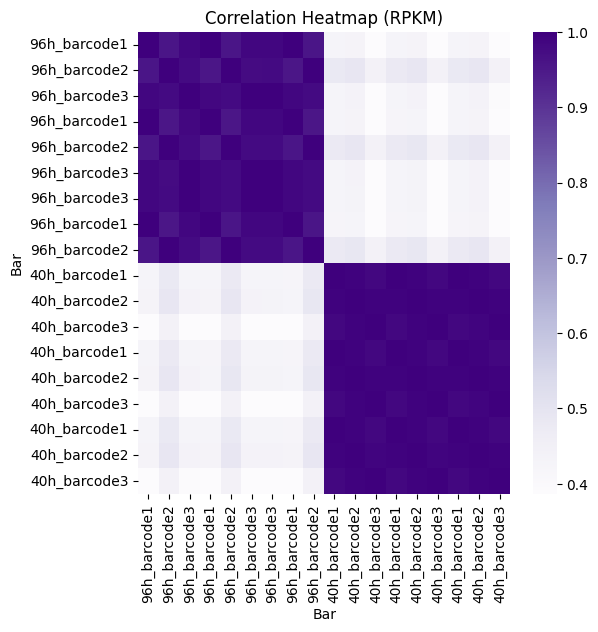

In [116]:
import seaborn as sns

RPKM.iloc[:,4:].set_index("Bar").T.corr()
# Compute the correlation matrix
correlation_matrix = RPKM.iloc[:, 4:].set_index("Bar").T.corr()

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="Purples", cbar=True)
plt.title("Correlation Heatmap (RPKM)")
plt.show()

In [78]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Select numeric columns from SraRunTable
numeric_columns = RPKM.select_dtypes(include=[np.number])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_columns)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=RPKM.index)

# Display the PCA results
pca_df

,PC1,PC2
0,-19117.202655,4647.865353
1,-14014.181894,-5241.955501
2,-17622.095491,-272.565709
3,-19147.251904,4805.580069
4,-14038.673340,-5196.478640
5,-17660.586522,-219.232417
6,-17712.866870,-196.681800
7,-19240.944292,4755.675955
8,-14073.887379,-5210.005735
9,16433.449957,237.954722


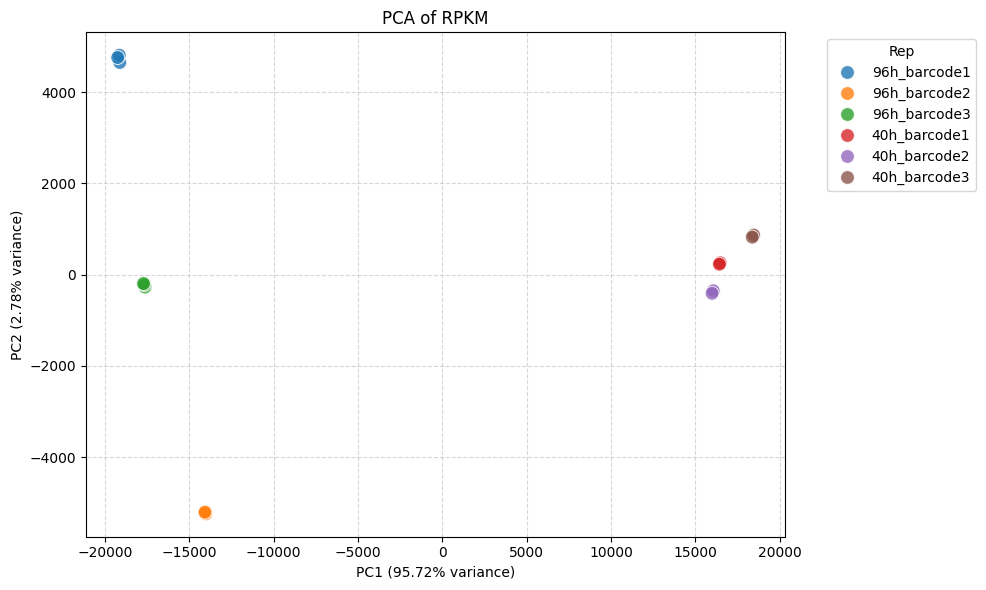

In [79]:
import seaborn as sns

# Add the 'Rep' column to the PCA DataFrame
pca_df['Bar'] = RPKM['Bar'].values

# Plot the PCA with hue as 'Rep'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Bar', palette='tab10', s=100, alpha=0.8)

# Aesthetic adjustments
plt.title('PCA of RPKM')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.legend(title='Rep', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [80]:
def CountCurve(df,col):
    Cuts = list(range(0,11))
    Values = df[col].values
    Counts = [int(np.sum(Values > c)) for c in Cuts]
    return Counts


In [81]:
counts_df = SraRunTable.groupby("Bar").mean(numeric_only=True).reset_index()

In [82]:
RPKM.groupby("Bar").mean(numeric_only=True).T.reset_index(drop=True)

Bar,40h_barcode1,40h_barcode2,40h_barcode3,96h_barcode1,96h_barcode2,96h_barcode3
0,4.308371,5.147709,4.536322,4.317885,4.784154,4.425650
1,2.137222,1.716919,2.058924,1.491325,2.866343,3.368299
2,3.918185,3.741954,3.382205,3.781253,4.532018,3.118732
3,22.996842,19.852290,28.918898,4.923384,5.480000,3.681608
4,4.594356,3.451883,5.552213,3.677710,3.544483,2.451243
...,...,...,...,...,...,...
13340,2.328117,2.352370,2.582923,2.412482,1.723731,2.093593
13341,5.436368,5.469048,5.920731,7.122889,8.208355,7.670688
13342,0.161195,0.111152,0.115285,0.655083,1.137264,0.988340
13343,0.000000,0.017408,0.027498,0.000000,0.000000,0.000000


In [83]:
Srr_Curve = RPKM.groupby("Bar").mean(numeric_only=True).T.reset_index(drop=True)

In [84]:
Srr_Curve 

Bar,40h_barcode1,40h_barcode2,40h_barcode3,96h_barcode1,96h_barcode2,96h_barcode3
0,4.308371,5.147709,4.536322,4.317885,4.784154,4.425650
1,2.137222,1.716919,2.058924,1.491325,2.866343,3.368299
2,3.918185,3.741954,3.382205,3.781253,4.532018,3.118732
3,22.996842,19.852290,28.918898,4.923384,5.480000,3.681608
4,4.594356,3.451883,5.552213,3.677710,3.544483,2.451243
...,...,...,...,...,...,...
13340,2.328117,2.352370,2.582923,2.412482,1.723731,2.093593
13341,5.436368,5.469048,5.920731,7.122889,8.208355,7.670688
13342,0.161195,0.111152,0.115285,0.655083,1.137264,0.988340
13343,0.000000,0.017408,0.027498,0.000000,0.000000,0.000000


In [85]:
Srr_Curve = Srr_Curve.iloc[:,3:]

In [86]:
Srr_Curve

Bar,96h_barcode1,96h_barcode2,96h_barcode3
0,4.317885,4.784154,4.425650
1,1.491325,2.866343,3.368299
2,3.781253,4.532018,3.118732
3,4.923384,5.480000,3.681608
4,3.677710,3.544483,2.451243
...,...,...,...
13340,2.412482,1.723731,2.093593
13341,7.122889,8.208355,7.670688
13342,0.655083,1.137264,0.988340
13343,0.000000,0.000000,0.000000


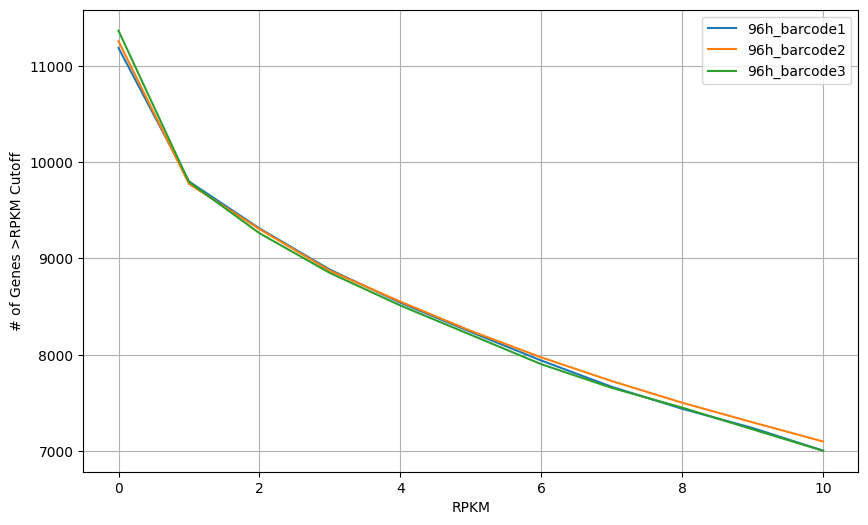

In [87]:
plt.figure(figsize=(10, 6))

Cuts = list(range(0,11))
for c in Srr_Curve.columns:
    counts = CountCurve(Srr_Curve, c)
    plt.plot(Cuts,counts, label=c)

plt.xlabel("RPKM")
plt.ylabel("# of Genes >RPKM Cutoff")
plt.grid(True)
plt.legend()
plt.show()

In [88]:
Counts["Genid"] = GenId
Counts = Counts.set_index("Genid").T.reset_index().rename(columns = {"index":"Run"})
Counts.columns.name = None 

In [89]:
Counts

,Run,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g13336,g13337,g13338,g13339,g13340,g13341,g13342,g13343,g13344,g13345
0,SRR2047529,60,26,32,37,22,31,67,146,732,...,0,0,0,0,1,99,238,68,0,0
1,SRR2047534,82,22,45,332,54,91,171,137,714,...,0,0,0,0,1,142,221,10,1,0
2,SRR2047528,62,26,36,27,24,20,59,140,719,...,0,0,0,2,1,97,211,72,0,0
3,SRR2047531,41,18,29,35,14,17,65,90,551,...,0,0,0,1,2,64,174,61,0,0
4,SRR2047526,36,7,25,25,17,20,41,91,469,...,0,0,0,3,1,78,130,34,0,0
5,SRR2047527,53,20,32,38,31,16,64,82,511,...,0,0,0,2,1,64,170,60,0,1
6,SRR2047530,44,6,23,31,25,18,44,99,500,...,0,0,0,2,0,76,144,28,0,0
7,SRR2047532,68,23,52,243,47,69,162,133,706,...,0,0,1,0,0,138,227,15,0,0
8,SRR2047535,96,26,61,299,58,83,168,119,855,...,0,0,0,1,0,164,216,22,0,0
9,SRR2047537,96,19,51,321,81,100,180,119,789,...,0,0,1,0,3,167,217,8,0,0


In [90]:
SraRunTable = SraRunTable.merge(
    Counts,
    on="Run"
)

In [91]:
counts_df = SraRunTable.groupby("Bar").mean(numeric_only=True).reset_index()

In [92]:
counts_df

,Bar,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g13336,g13337,g13338,g13339,g13340,g13341,g13342,g13343,g13344,g13345
0,40h_barcode1,85.000000,25.666667,54.000000,272.333333,54.000000,77.333333,166.000000,125.333333,779.000000,...,0.0,0.0,0.333333,1.333333,0.000000,152.000000,216.666667,14.666667,0.000000,0.000000
1,40h_barcode2,74.000000,15.000000,37.666667,171.666667,29.666667,47.000000,97.000000,92.333333,597.000000,...,0.0,0.0,0.000000,0.000000,1.000000,112.000000,159.333333,7.333333,0.333333,0.000000
2,40h_barcode3,85.666667,23.666667,44.666667,327.666667,62.666667,91.666667,170.666667,123.333333,767.000000,...,0.0,0.0,0.333333,0.000000,1.666667,161.666667,226.333333,10.000000,0.666667,0.000000
3,96h_barcode1,41.333333,8.666667,25.333333,28.333333,21.000000,21.000000,39.333333,93.666667,484.666667,...,0.0,0.0,0.000000,4.666667,0.333333,76.666667,138.333333,29.000000,0.000000,0.000000
4,96h_barcode2,47.333333,17.333333,31.333333,32.666667,21.000000,18.333333,64.000000,87.666667,516.000000,...,0.0,0.0,0.000000,1.000000,1.000000,56.666667,164.666667,52.000000,0.000000,0.333333
5,96h_barcode3,63.333333,29.333333,31.333333,31.666667,21.000000,25.666667,56.000000,139.333333,702.666667,...,0.0,0.0,0.000000,4.000000,0.666667,99.333333,222.666667,65.333333,0.000000,0.000000


In [93]:
counts_df.set_index("Bar", inplace=True)
counts_df.index.name = None

In [94]:
keep = counts_df.columns[counts_df.sum(axis=0) >= 20]
counts_df = counts_df[keep]

In [95]:
counts_df = counts_df.astype(int)

In [96]:
counts_df

,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,...,g13311,g13312,g13313,g13314,g13315,g13316,g13317,g13341,g13342,g13343
40h_barcode1,85,25,54,272,54,77,166,125,779,60,...,307,119,508,23,99,279,115,152,216,14
40h_barcode2,74,15,37,171,29,47,97,92,597,52,...,281,95,474,17,86,194,80,112,159,7
40h_barcode3,85,23,44,327,62,91,170,123,767,61,...,382,130,550,32,97,219,104,161,226,10
96h_barcode1,41,8,25,28,21,21,39,93,484,29,...,541,99,786,11,90,30,47,76,138,29
96h_barcode2,47,17,31,32,21,18,64,87,516,26,...,562,126,881,7,61,29,47,56,164,52
96h_barcode3,63,29,31,31,21,25,56,139,702,38,...,781,138,1220,10,111,35,59,99,222,65


In [97]:
metadata = SraRunTable[["Bar","time_point"]].drop_duplicates()
metadata.set_index("Bar", inplace=True)
metadata.index.name = None
metadata.sort_index()

,time_point
40h_barcode1,40 hrs after inoculation
40h_barcode2,40 hrs after inoculation
40h_barcode3,40 hrs after inoculation
96h_barcode1,96 hrs after inoculation
96h_barcode2,96 hrs after inoculation
96h_barcode3,96 hrs after inoculation


In [98]:
inference = DefaultInference(n_cpus=12)
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata.sort_index(),
    design="~time_point",
    refit_cooks=True,
    inference=inference,
)

In [99]:
dds.deseq2()

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.70 seconds.

Fitting dispersion trend curve...
... done in 0.13 seconds.

Fitting MAP dispersions...
... done in 0.96 seconds.

Fitting LFCs...
... done in 0.49 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.



In [100]:
print(dds)

AnnData object with n_obs × n_vars = 6 × 10354
    obs: 'time_point'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    layers: 'normed_counts', '_mu_hat', 'cooks'


In [101]:
ds = DeseqStats(dds, contrast=["time_point", "40 hrs after inoculation", "96 hrs after inoculation"], inference=inference)

In [102]:
ds.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: time_point 40 hrs after inoculation vs 96 hrs after inoculation
          baseMean  log2FoldChange     lfcSE       stat        pvalue  \
g1       63.444972       -0.041273  0.202242  -0.204078  8.382923e-01   
g2       18.853045       -0.487374  0.402051  -1.212218  2.254288e-01   
g3       36.047254       -0.119087  0.271654  -0.438377  6.611133e-01   
g4      116.487903        2.305472  0.246649   9.347161  9.003203e-21   
g5       31.893416        0.420991  0.325565   1.293109  1.959735e-01   
...            ...             ...       ...        ...           ...   
g13316  108.575822        2.132794  0.213259  10.000939  1.509591e-23   
g13317   70.955629        0.217605  0.194930   1.116325  2.642829e-01   
g13341  103.219674        0.135755  0.185321   0.732539  4.638398e-01   
g13342  187.434585       -0.541736  0.126465  -4.283673  1.838329e-05   
g13343   34.426078       -2.965976  0.373647  -7.937900  2.056332e-15   

                padj 

... done in 0.39 seconds.



In [103]:
deg_df = ds.results_df

In [104]:
deg_df["log10padj"] = -np.log10(deg_df['padj'])

/home/tiago/anaconda3/envs/bio/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [105]:
deg_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,log10padj
g1,63.444972,-0.041273,0.202242,-0.204078,8.382923e-01,8.791370e-01,0.055943
g2,18.853045,-0.487374,0.402051,-1.212218,2.254288e-01,3.000211e-01,0.522848
g3,36.047254,-0.119087,0.271654,-0.438377,6.611133e-01,7.294965e-01,0.136977
g4,116.487903,2.305472,0.246649,9.347161,9.003203e-21,6.919834e-20,19.159904
g5,31.893416,0.420991,0.325565,1.293109,1.959735e-01,2.663315e-01,0.574577
...,...,...,...,...,...,...,...
g13316,108.575822,2.132794,0.213259,10.000939,1.509591e-23,1.300232e-22,21.885979
g13317,70.955629,0.217605,0.194930,1.116325,2.642829e-01,3.439499e-01,0.463505
g13341,103.219674,0.135755,0.185321,0.732539,4.638398e-01,5.508928e-01,0.258933
g13342,187.434585,-0.541736,0.126465,-4.283673,1.838329e-05,5.097007e-05,4.292685


In [106]:
deg_df['significant'] = (abs(deg_df['log2FoldChange']) > 1) & (deg_df['padj'] < 0.01)

In [107]:
deg_df = deg_df.reset_index().rename(columns={"index": "gene"})

In [108]:
deg_df

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,log10padj,significant
0,g1,63.444972,-0.041273,0.202242,-0.204078,8.382923e-01,8.791370e-01,0.055943,False
1,g2,18.853045,-0.487374,0.402051,-1.212218,2.254288e-01,3.000211e-01,0.522848,False
2,g3,36.047254,-0.119087,0.271654,-0.438377,6.611133e-01,7.294965e-01,0.136977,False
3,g4,116.487903,2.305472,0.246649,9.347161,9.003203e-21,6.919834e-20,19.159904,True
4,g5,31.893416,0.420991,0.325565,1.293109,1.959735e-01,2.663315e-01,0.574577,False
...,...,...,...,...,...,...,...,...,...
10349,g13316,108.575822,2.132794,0.213259,10.000939,1.509591e-23,1.300232e-22,21.885979,True
10350,g13317,70.955629,0.217605,0.194930,1.116325,2.642829e-01,3.439499e-01,0.463505,False
10351,g13341,103.219674,0.135755,0.185321,0.732539,4.638398e-01,5.508928e-01,0.258933,False
10352,g13342,187.434585,-0.541736,0.126465,-4.283673,1.838329e-05,5.097007e-05,4.292685,False


In [109]:
column_names = [
    "Protein accession",
    "Sequence MD5 digest",
    "Sequence length",
    "Analysis",
    "Signature accession",
    "Signature description",
    "Start location",
    "Stop location",
    "Score",
    "Status",
    "Date",
    "InterPro annotations - accession",
    "InterPro annotations - description",
    "GO annotations",
    "Pathways annotations"
]
Interpro = pd.read_csv(
    "interproscan_1.tsv",
    sep = "\t",
    names = column_names
)


In [110]:
Interpro["gene"] = Interpro["Protein accession"].apply(lambda x: x.split(".")[0])

In [111]:
deg_df = deg_df.merge(
    Interpro,
    on = "gene"
)

In [112]:
deg_df["lignin"] =  deg_df["Signature description"].str.contains("lignin", case=False) | \
                    deg_df["InterPro annotations - description"].str.contains("lignin", case=False) | \
                    deg_df["Signature description"].str.contains("Manganese", case=False) | \
                    deg_df["InterPro annotations - description"].str.contains("Manganese", case=False) | \
                    deg_df["Signature description"].str.contains("Arabinanase", case=False) | \
                    deg_df["InterPro annotations - description"].str.contains("Arabinanase", case=False)


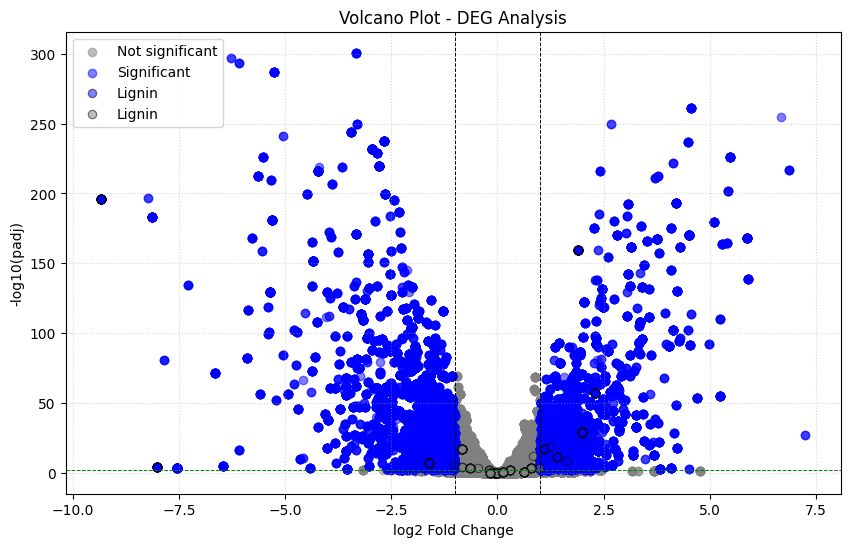

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(
    x=deg_df.loc[~deg_df['significant'], 'log2FoldChange'],
    y=deg_df.loc[~deg_df['significant'], 'log10padj'],
    color='gray', alpha=0.5, label='Not significant'
    
)

plt.scatter(
    x=deg_df.loc[deg_df['significant'], 'log2FoldChange'],
    y=deg_df.loc[deg_df['significant'], 'log10padj'],
    color='blue', alpha=0.5, label='Significant'
)

plt.scatter(
    x=deg_df.loc[(deg_df["lignin"]) & (deg_df["significant"]), "log2FoldChange"],
    y=deg_df.loc[(deg_df["lignin"]) & (deg_df["significant"]), "log10padj"],
    color='blue', edgecolor='black', linewidth=0.9, alpha=0.5, label='Lignin'
)

plt.scatter(
    x=deg_df.loc[(deg_df["lignin"]) & (~deg_df["significant"]), "log2FoldChange"],
    y=deg_df.loc[(deg_df["lignin"]) & (~deg_df["significant"]), "log10padj"],
    color='gray', edgecolor='black', linewidth=0.9, alpha=0.5, label='Lignin'
)


plt.axvline(x= 1, color='black', linestyle='--', linewidth=0.7)
plt.axvline(x=-1, color='black', linestyle='--', linewidth=0.7)
plt.axhline(y=-np.log10(0.01), color='green', linestyle='--', linewidth=0.7)  # p-value = 0.05

# Ajustes estéticos
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10(padj)')
plt.title('Volcano Plot - DEG Analysis')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.5)

plt.show()

In [114]:
deg_df.loc[(deg_df["lignin"]) & (deg_df["significant"])].drop_duplicates("gene").sort_values("log2FoldChange", ascending=False)

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,log10padj,significant,Protein accession,...,Start location,Stop location,Score,Status,Date,InterPro annotations - accession,InterPro annotations - description,GO annotations,Pathways annotations,lignin
73087,g10766,276.704929,2.299628,0.141612,16.238901,2.676754e-59,5.998361e-58,57.221967,True,g10766.t1,...,27,40,4.4E-74,T,02-04-2024,IPR001621,Fungal ligninase,GO:0004601(InterPro)|GO:0006979(InterPro)|GO:0...,MetaCyc:PWY-5461|MetaCyc:PWY-5466|MetaCyc:PWY-...,True
43986,g6470,170.037923,1.985140,0.171635,11.566060,6.123019e-31,6.981455e-30,29.156054,True,g6470.t1,...,29,361,0.0,T,02-04-2024,IPR001621,Fungal ligninase,GO:0004601(InterPro)|GO:0006979(InterPro)|GO:0...,MetaCyc:PWY-5461|MetaCyc:PWY-5466|MetaCyc:PWY-...,True
44600,g6576,3139.205637,1.895877,0.069884,27.128763,4.509310e-162,4.763764e-160,159.322050,True,g6576.t1,...,23,356,3.20569E-179,T,02-04-2024,IPR001621,Fungal ligninase,GO:0004601(InterPro)|GO:0006979(InterPro)|GO:0...,MetaCyc:PWY-5461|MetaCyc:PWY-5466|MetaCyc:PWY-...,True
21546,g3061,70.765996,1.638625,0.272110,6.021929,1.723504e-09,6.981001e-09,8.156082,True,g3061.t1,...,324,345,-,T,02-04-2024,IPR020855,"Ureohydrolase, manganese-binding site",GO:0016813(InterPro)|GO:0046872(InterPro),MetaCyc:PWY-31|MetaCyc:PWY-40|MetaCyc:PWY-46|M...,True
65014,g9432,85.866236,1.406605,0.199559,7.048561,1.807778e-12,8.985080e-12,11.046478,True,g9432.t1,...,83,108,3.1E-39,T,02-04-2024,IPR001621,Fungal ligninase,GO:0004601(InterPro)|GO:0006979(InterPro)|GO:0...,MetaCyc:PWY-5461|MetaCyc:PWY-5466|MetaCyc:PWY-...,True
88402,g13078,195.157347,1.228182,0.134205,9.151511,5.614245e-20,4.169604e-19,18.379905,True,g13078.t1,...,325,346,-,T,02-04-2024,IPR020855,"Ureohydrolase, manganese-binding site",GO:0016813(InterPro)|GO:0046872(InterPro),MetaCyc:PWY-31|MetaCyc:PWY-40|MetaCyc:PWY-46|M...,True
44036,g6472,1070.626354,1.106491,0.125576,8.811298,1.237050e-18,8.543813e-18,17.068348,True,g6472.t1,...,244,323,1.1E-21,T,02-04-2024,IPR024589,"Fungal ligninase, C-terminal",-,MetaCyc:PWY-5461|MetaCyc:PWY-5466|MetaCyc:PWY-...,True
87219,g12934,2496.309131,-1.026928,0.192794,-5.326546,1.000979e-07,3.503427e-07,6.455507,True,g12934.t1,...,25,300,2.57E-56,T,02-04-2024,IPR023296,"Glycosyl hydrolase, five-bladed beta-propeller...",-,MetaCyc:PWY-1822|MetaCyc:PWY-1921|MetaCyc:PWY-...,True
38293,g5329,391.407608,-1.603589,0.294294,-5.448932,5.067329e-08,1.820967e-07,6.739698,True,g5329.t1,...,29,361,0.0,T,02-04-2024,IPR001621,Fungal ligninase,GO:0004601(InterPro)|GO:0006979(InterPro)|GO:0...,MetaCyc:PWY-5461|MetaCyc:PWY-5466|MetaCyc:PWY-...,True
10973,g1310,18.403907,-8.012482,1.998181,-4.009888,6.074758e-05,1.589787e-04,3.798661,True,g1310.t1,...,27,40,3.4E-90,T,02-04-2024,IPR001621,Fungal ligninase,GO:0004601(InterPro)|GO:0006979(InterPro)|GO:0...,MetaCyc:PWY-5461|MetaCyc:PWY-5466|MetaCyc:PWY-...,True
